## Visualization of Inference-based Analyses 
We visualize results of inference-based analyses. By Inference-based analyses we mean analyses which extract characteristics of the data by applying language models to them or in general inference-based processes. 

### 1. Query Intent
We apply an intent classifier to the queries. The model classifies the data into the categories *informational*, *navigational* and *transactual*. 


In [1]:
from thesis_schneg.model import DatasetName

##### set visualization configuration #####

# combine all plots in one figure or plot each analysis in a single figure
single_plot = True
# single_plot = False

# save visualization or not
save_vis: bool = False
# save_vis: bool = True

# select dataset (if none is selected all datasets are visualized in a joint plot) 
dataset: DatasetName = None 
# dataset: DatasetName = 'aol'
# dataset: DatasetName = 'aql'
# dataset: DatasetName = 'ms-marco'
# dataset: DatasetName = 'orcas'

analyses = []
# set analysis that should be visualized
analyses.append('query-intent')

# test_data = True
test_data = False

normalize_data = True
# normalize_data = False

# take_new_directory = True
take_new_directory = False

# col = ['count()']

In [4]:
from thesis_schneg.vis_modules import _get_results_paths, load_results
import time
color = None
label = None
# load data
analysis_data = []
for analysis_name in analyses:
    if dataset is None:
        result_data = {}
        # crawl files from all datasets and load into dictionary

        paths = {f"{name}": _get_results_paths(name, analysis_name, take_new_directory) for name in [
                "aol", "aql", "ms-marco", "orcas"]}
        # iterate over datasets and create visualization
        for name, result_paths in paths.items():
            start_time = time.time()
            print(f"Loading data from {name} dataset")
            vis_data = load_results(result_paths, test_data=test_data)
            result_data.update({name: vis_data})
            end_time = time.time()  
            print(f"{name} loaded in {(end_time - start_time)/60} min")
        label=["AOL", "AQL", "MS-MARCO", "ORCAS"]
        analysis_data.append(result_data)
    else:
        # load data from single dataset
        result_paths = _get_results_paths(dataset, analysis_name, take_new_directory)
        start_time = time.time()
        print(f"Loading data from {dataset} dataset")
        result_data = {dataset: load_results(result_paths, test_data=test_data)}
        end_time = time.time()  
        print(f"{dataset} loaded in {(end_time - start_time)/60} min")
        analysis_data.append(result_data)   

Loading data from aol dataset
aol loaded in 0.010399111111958821 min
Loading data from aql dataset
aql loaded in 0.010409728686014811 min
Loading data from ms-marco dataset
ms-marco loaded in 0.010376362005869548 min
Loading data from orcas dataset
orcas loaded in 0.010767046610514324 min


In [11]:
for item in analysis_data:
    for key, value in item.items():
        print(key)
        print(value)
        print(f"{value['count()'].sum()/1e6} x 10^6 queries")

aol
    query-intent   count()
0   Navigational  11811713
0        Abstain  23744050
0  Transactional    833804
36.389567 x 10^6 queries
aql
    query-intent   count()
0        Abstain  25149297
0   Navigational   4967622
0  Transactional    505141
30.62206 x 10^6 queries
ms-marco
    query-intent  count()
0  Transactional    40018
0        Abstain  1229443
0   Navigational    89826
1.359287 x 10^6 queries
orcas
    query-intent  count()
0        Abstain  8644331
0  Transactional   439845
0   Navigational  1321135
10.405311 x 10^6 queries


Visualizing query-intent
[{'dataset-col-x': 'query-intent', 'dataset-col-y': 'count()', 'x-label': 'Intent', 'y-label': 'Frequency', 'x-lim': None, 'y-lim': None, 'title': 'Query Intent Distribution'}]


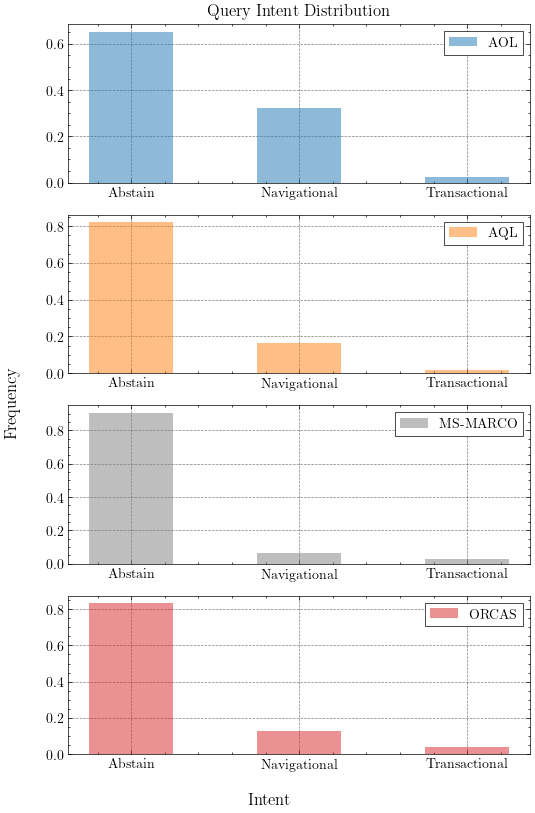

In [3]:
from thesis_schneg.vis_modules import bar_plot, get_xlim
from pathlib import Path
from matplotlib import pyplot as plt
import matplotlib
import scienceplots

analyses_params = []

vis_params = {"dataset-col-x": "query-intent", "dataset-col-y": "count()", "x-label": "Intent", "y-label": "Frequency", "x-lim": None, "y-lim": None, "title": "Query Intent Distribution"}
analyses_params.append(vis_params)


# latex rendering for matplotlib
matplotlib.rcParams.update(
    {
        "pgf.texsystem": "pdflatex",
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
    }
)
base_path = "/home/benjamin/studium/masterarbeit/thesis-schneg/plots/"
if take_new_directory:
    base_path = base_path + "updated_plots/"
# set path to save visualization
if len(analyses) > 1:
    vis_dir = Path(
        f"{base_path}{analyses[0]}-and-{analyses[1]}")
else:
    vis_dir = Path(
        f"{base_path}{analyses[0]}")
    
# vis_dir = Path(
#         f"/home/benjamin/studium/masterarbeit/thesis-schneg/plots/extract-named-entities")

# make directory if it does not exist
if not vis_dir.exists() and save_vis:
        vis_dir.mkdir(parents=True)

# enable pgf format for matplotlib
if save_vis:
    matplotlib.use("pgf")
# use science style for plots from scienceplots library
plt.style.use(["science", "grid"])

# create subplots for each dataset
# set size of plot
textwidth = 5.5129
aspect_ratio = 6/8
scale = 1.0
width = textwidth * scale
height = width * aspect_ratio

bar_width = 0.5 
if dataset is None:
    fig, ax = plt.subplots(ncols=len(analyses), nrows=4, figsize=(width, 2*height))
else:
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(width, height))
for i in range(len(analyses)):   
    result_data = analysis_data[i]
    vis_params = analyses_params[i]
    print(f"Visualizing {analysis_name}")
    print(analyses_params)
    # create visualization for all data sets if dataset is not specified
    if dataset is None:

        multi = True
        # color palette for datasets
        color =  ['tab:blue', 'tab:orange', 'tab:gray', 'tab:red']

        # get xlim
        xlims = []
        # for name, vis_data in result_data.items():
        #     # xlims.append(get_xlim(vis_data, vis_params, threshold=0.054, bar_width=bar_width)[1]) #0.054
        #     xlims.append((0,8))
        # if max(xlims) > 10:
        #     vis_params["x-lim"] = [-1, max(xlims)]
        # else:
        #     vis_params["x-lim"] = [0-bar_width, max(xlims)]
        # counter for datasets
        cnt_datasets = 0
        # iterate over datasets and create visualization
        for name, vis_data in result_data.items():
            # normalize data
            if normalize_data:
                vis_data[vis_params["dataset-col-y"]] = vis_data[vis_params["dataset-col-y"]] / \
                    vis_data[vis_params["dataset-col-y"]].sum()
            vis_data = vis_data.sort_values(vis_params["dataset-col-x"], ascending=True)
            # apply specific visualization function
            if len(analyses) > 1:
                fig, ax[cnt_datasets,i] = bar_plot(data=vis_data, subplots=(fig, ax[cnt_datasets,i]),
                                                vis_params=vis_params, label=label[cnt_datasets], multi=multi, color=color[cnt_datasets], bar_width=bar_width)
                if cnt_datasets == 0:
                    ax[cnt_datasets,i].set_title(vis_params["title"])
            else:
                fig, ax[cnt_datasets] = bar_plot(data=vis_data, subplots=(fig, ax[cnt_datasets]),
                                                vis_params=vis_params, label=name.upper(), multi=multi, color=color[cnt_datasets], bar_width=bar_width) #, color=color[cnt_datasets]
                if cnt_datasets == 0:
                    ax[cnt_datasets].set_title(vis_params["title"])
            cnt_datasets += 1
            


    # create visualization for a specific data set:
    else: 
        multi = False 
        # get xlim
        xlims = []
        for name, vis_data in result_data.items():
            xlims.append(get_xlim(vis_data, vis_params, threshold=0.015, bar_width=bar_width)[1]) #0.054
        vis_params["x-lim"] = [0-bar_width, max(xlims)]

        if normalize_data:
            vis_data[vis_params["dataset-col-y"]] = vis_data[vis_params["dataset-col-y"]] / \
                    vis_data[vis_params["dataset-col-y"]].sum()
        
        vis_data = vis_data.sort_values(vis_params["dataset-col-x"], ascending=True)
        
        # modify title
        vis_params["title"] = f'{vis_params["title"]} ({dataset.upper()})'

        # set size of plot
        textwidth = 5.5129
        aspect_ratio = 6/8
        scale = 1.0
        width = textwidth * scale
        height = width * aspect_ratio

        # # create subplot for dataset
        # fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(width, height))

        # apply specific visualization function
        fig, ax = bar_plot(data=vis_data, subplots=(fig, ax),
                                                vis_params=vis_params, multi=multi,  bar_width=bar_width)
        
        # # make layout tight
        # plt.tight_layout()
        
        # # either save visualization or show it
        # if save_vis:
        #     fig.savefig(vis_dir.joinpath(f"{dataset}.pgf"))
        # else:
        #     plt.show()

if dataset is None:
    fig.supxlabel(analyses_params[0]["x-label"])
    fig.supylabel(analyses_params[0]["y-label"])
# make layout tight
plt.tight_layout()

# either save visualization or show it  
if save_vis:
    if dataset is not None:
        fig.savefig(vis_dir.joinpath(f"{dataset}.pgf"))
    else:
        fig.savefig(vis_dir.joinpath("all.pgf"))
else:
    plt.show()


